# 1. 데이터 설명 및 보기

Data Dictionary
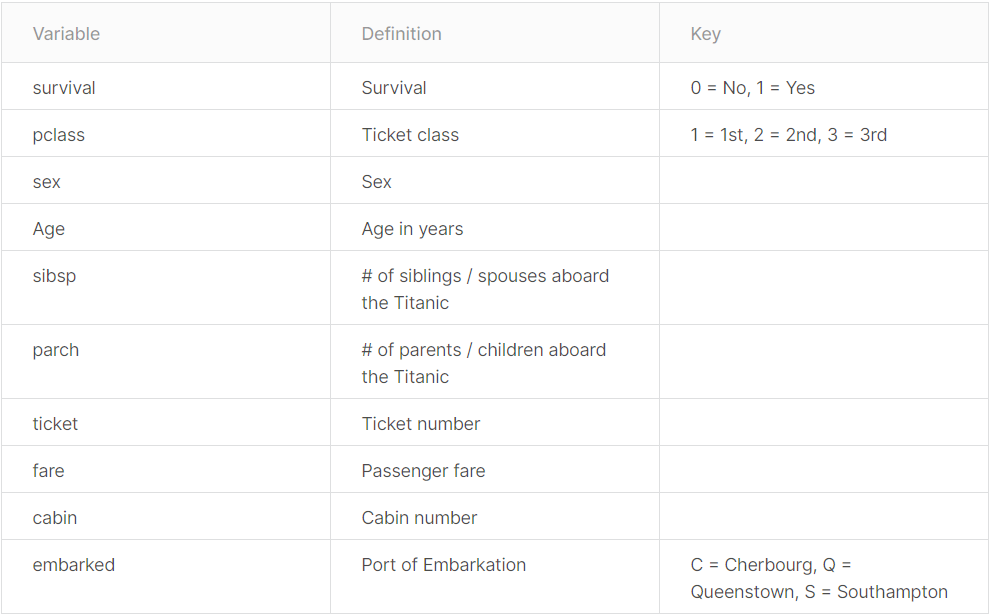

데이터 출처 : https://www.kaggle.com/c/titanic/overview

1-1.데이터 보기

In [1]:
import pandas as pd 

file_path = './dataset/train.csv'
df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1-2. 데이터프레임의 기본 정보 출력

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1-2. 데이터프레임의 통계 요약 정보 출력

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1-3. 데이터유형 확인

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2. 데이터 기초 분석/탐색

범주형 : PassengerId, Survived, Pclass, Name, Sex, Embarked <br>연속형 : Age, SibSp, Parch, Ticket, Fare, Cabin

생존자와 관련이 있는 변수로는 성별, 선실, 나이 등이 있습니다.

In [5]:
df1=df.pivot_table(['Survived'],index=['Sex','Pclass'],aggfunc='mean')
df1

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

# 3. 데이터 클린징

3-1. 결측값 : Age, Cabin, Embarked

In [6]:
#데이터 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

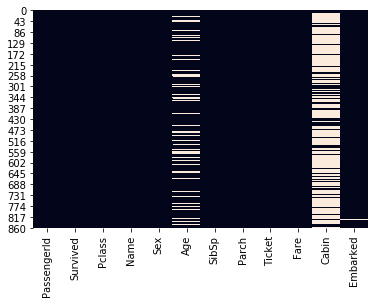

In [7]:
#시본 시각화 확인
sns.heatmap(df.isnull(), cbar=False)

Cabin은 결측치가 너무 많기 때문에 열을 제거합니다.

In [8]:
#Cabin 결측치 제거
df = df.dropna(thresh = int(len(df)*0.5),axis=1)

Age는 생존 여부와 밀접한 관련이 있을거라 예상되기 때문에 결측치를 평균값으로 대체합니다.

In [9]:
#Age 결측치 제거
df['Age']=df['Age'].fillna(df['Age'].mean())

C:\Users\tjdwn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Embarked는 2개의 결측치가 존재하고 범주형이므로 최빈값으로 대체합니다.

In [10]:
#Embarked 범주형 개수 확인
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\tjdwn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


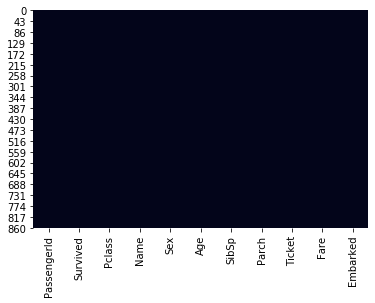

In [11]:
#Embarked 결측치 제거 - 최빈값인 S로 대체
df['Embarked']= df['Embarked'].fillna('S')
sns.heatmap(df.isnull(), cbar=False)

In [12]:
del df['PassengerId']
del df['Name']
del df['Ticket']

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# 4. 데이터 시각화

생존자 중심으로 교차 분석(범주형*범주형) <br>① 성별/생존자 <br>② 객실등급별/생존자 <br>③ 탑승항구별/생존자 <br>④ 연령대그룹별/생존자

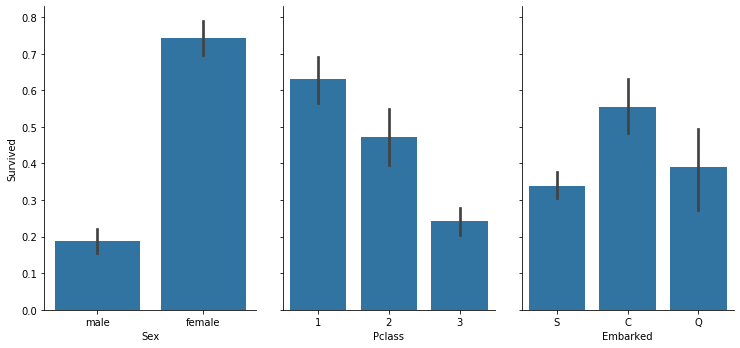

In [15]:
Pg=sns.PairGrid(df, y_vars="Survived",
               x_vars=["Sex","Pclass","Embarked"],
               height=5, aspect=.7)
Pg.map(sns.barplot)
plt.rc('font',family='Malgun Gothic')


성별/생존자의 경우 여성의 생존율이 높고 남자가 생존율이 낮은 것을 알 수 있습니다. 객실등급별/생존자의 경우 1번 객실의 생존율이 가장 높습니다. 탑승항구별/생존자의 경우 C가 가장 생존율이 높다는 것을 확인할 수 있습니다.

생존자 중심으로 교차 분석(범주형*연속형) <br>① 성별/나이/생존율 <br>② 성별/형제,자매 수/생존율

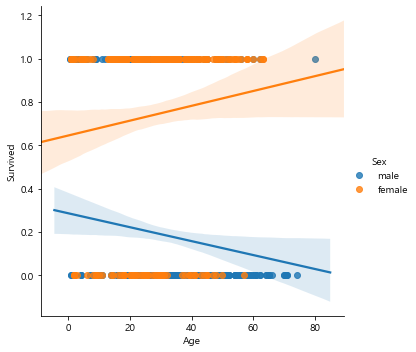

In [16]:
sns.lmplot('Age','Survived', hue='Sex', data=df)

연령에 따라 생존율과 상관성이 성별에 따라 다르다는 것을 알 수 있고, 남성일 경우 나이가 많을 수록 사망자 수가 높지만, 여성의 경우 나이가 많을 수록 사망자가 낮게 나타납니다.

C:\Users\tjdwn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjdwn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


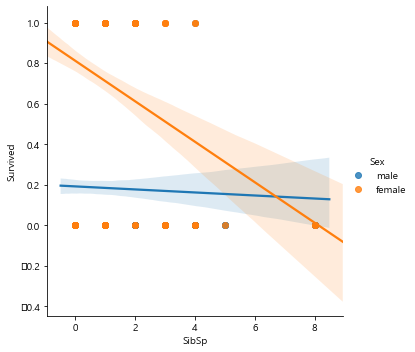

In [17]:
sns.lmplot('SibSp','Survived', hue='Sex', data=df)

여성의 경우 형제/자매가 많을 수록 사망률이 증가하며, 남성의 겨우 차이가 없는 경향이 있습니다. 

# 5. 머신러닝

test data도 train data와 마찬가지로 전처리 과정을 진행합니다. <br>결측치 제거, 불필요 변수 제거, 원핫 인코딩

5-1. test data 준비

In [18]:
#test data 로드
file_path = './dataset/test.csv'
df_test = pd.read_csv(file_path)

In [19]:
test_PassengerId=df_test["PassengerId"]

In [20]:
#데이터 결측치 확인
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
#Age 결측치 제거
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

In [22]:
#Fare 결측치 제거
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [23]:
#불필요한 변수 제거
del df_test['PassengerId']
del df_test['Name']
del df_test['Ticket']
del df_test['Cabin']

In [24]:
#데이터 원핫 인코딩
df_test['Sex']=df_test['Sex'].astype('category')
df_test['Pclass']=df_test['Pclass'].astype('category')
df_test['Embarked']=df_test['Embarked'].astype('category')
df_test = pd.get_dummies(df_test)

In [25]:
#test data 준비
x_test=df_test.iloc[:,0:]
x_test=x_test.values

5-2. train data에 대한 DecisionTree 모델 훈련

In [26]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#데이터 원핫 인코딩
df['Sex']=df['Sex'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df = pd.get_dummies(df)

C:\Users\tjdwn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\tjdwn\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\tjdwn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [27]:
#train data 준비
x_data=df.iloc[:,1:]
y_data=df.iloc[:,0]
x_data=x_data.values
y_data=y_data.values

In [28]:
#DecisionTree 모델링
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
estimator.fit(x_data,y_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
#train 학습
y_predict = estimator.predict(x_data)
score=metrics.accuracy_score(y_data, y_predict)
print('train score: ',score)

train score:  0.9820426487093153


train data에 대한 DecisionTree 모델로 훈련시킨 결과 train_score가 0.98의 정확도가 나온 것을 확인할 수 있습니다.

5-3. test data로 모델 예측

In [26]:
#test 평가
y_predict= estimator.predict(x_test)
print(y_predict)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 0]


In [56]:
#열이 PassengerId, Survived인 dataframe 만들기
test_dataframe=pd.DataFrame({"PassengerId":test_PassengerId,"Survived":y_predict})
test_dataframe = test_dataframe.set_index('PassengerId')
test_dataframe

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [57]:
#만든 dataframe을 csv로 변환
test_dataframe.to_csv('C:./dataset/titanic_test_label.csv')

5-4. 모델 평가

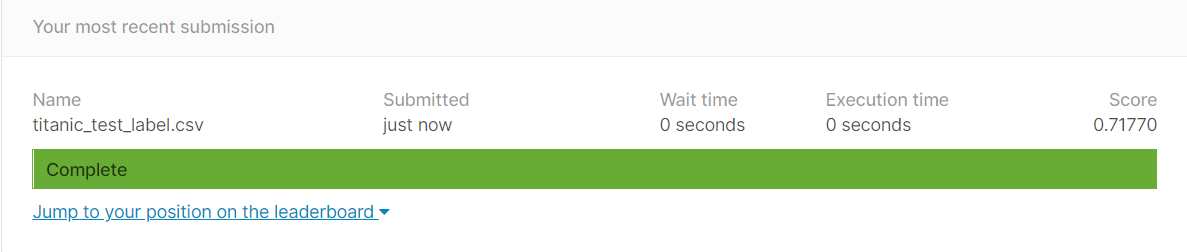

kaggle에 test data를 제출한 결과, 0.71770의 정확도를 확인할 수 있습니다. 